# **Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation**
# Prashansa Rathod 
# 8993410

Objective: build a model that can best predict the risk of diabetes progression. This will be used as a screening tool to help physicians with identifying patients at risk. The models that we look into are:
1. Univariate polynomial regression models
2. Multivariate Polynomial models
3. Decision Trees
4. kNNs

# **Part 1**

#  **Step 1** Get the data :
We’ll load the Scikit-Learn diabetes dataset, which is a regression dataset where the dependent variable is a **measure of disease progression after one year.**

In [12]:
from sklearn import datasets
import pandas as pd

# Load the diabetes dataset
diabetes_data = datasets.load_diabetes(as_frame=True)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target  # The target variable (disease progression)

# Display the first few rows of the dataset
display(df.head())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# **Step 2** Framing the problem 

- In this dataset:

- Dependent Variable: target (This is the disease progression one year after baseline).
Independent Variables: There are 10 features that represent different measurements collected at baseline.
The goal of this problem is to predict the disease progression (target) based on the patient's baseline measurements (independent variables). This is a regression problem where we aim to predict a continuous outcome (the progression of diabetes).

- Problem Framing:
We are building a predictive model that can estimate the risk of diabetes progression after one year. This model will help physicians identify patients at higher risk of worsening diabetes, allowing for earlier interventions or treatment adjustments.
The independent variables are as follows:

**age: Age in years** 
sex: Sex (0: female, 1: male)
bmi: Body mass index
bp: Average blood pressure
s1 to s6: Six blood serum measurements
The target variable is the quantitative measure of disease progression one year after baseline.

Next Steps:
We’ll explore the relationships between the features and the target, split the dataset into training and testing sets, and build various regression models (like polynomial regression, decision trees, kNN) to predict the diabetes progression.

# **Step 3 :** Exploratory Data Analysis (EDA) Insights:

**Statistics:**

- The dataset contains 442 samples.
- The mean of the target variable (disease progression) is 152.13 with a standard deviation of 77.09.
- All features are normalized, with mean values close to zero, which suggests that the dataset has been preprocessed.
- The minimum and maximum values of the target variable range from 25 to 346, indicating a wide range of diabetes progression.

**Scatter Plots:**

- Scatter plots between the features and the target variable show some clear relationships. For example:
BMI appears to have a positive correlation with the target, indicating that higher BMI is associated with greater disease progression.
- Blood Pressure (bp) shows a weak positive trend with the target, though not as pronounced.
Other features like s5 also show a strong positive correlation.

 **Histograms:**

- The histograms show the distribution of each feature.
- Features like bmi and bp show more symmetrical distributions, while some others like age and s6 appear slightly skewed.

 **Correlation Matrix:**

- The correlation heatmap highlights that BMI, s5, and bp have stronger correlations with the target.
- The correlation of BMI with the target is one of the highest at 0.59, suggesting it may be a key predictor of diabetes progression.
s5 has an even stronger correlation with the target at 0.57.
- Several features, such as age and sex, show weaker correlations with the target.

 **Concise Insights:**
  
- The features BMI and s5 (a serum measurement) seem to be the most significant predictors of diabetes progression.
- The data is well normalized, and scatter plots suggest non-linear relationships between the features and the target, which may benefit from more complex regression models like polynomial regression or decision trees.
- The dataset is suitable for regression modeling as the target variable is continuous, and the exploratory analysis reveals potential key variables for further modeling.

**1. Scatter Plots for Each Feature vs Target**

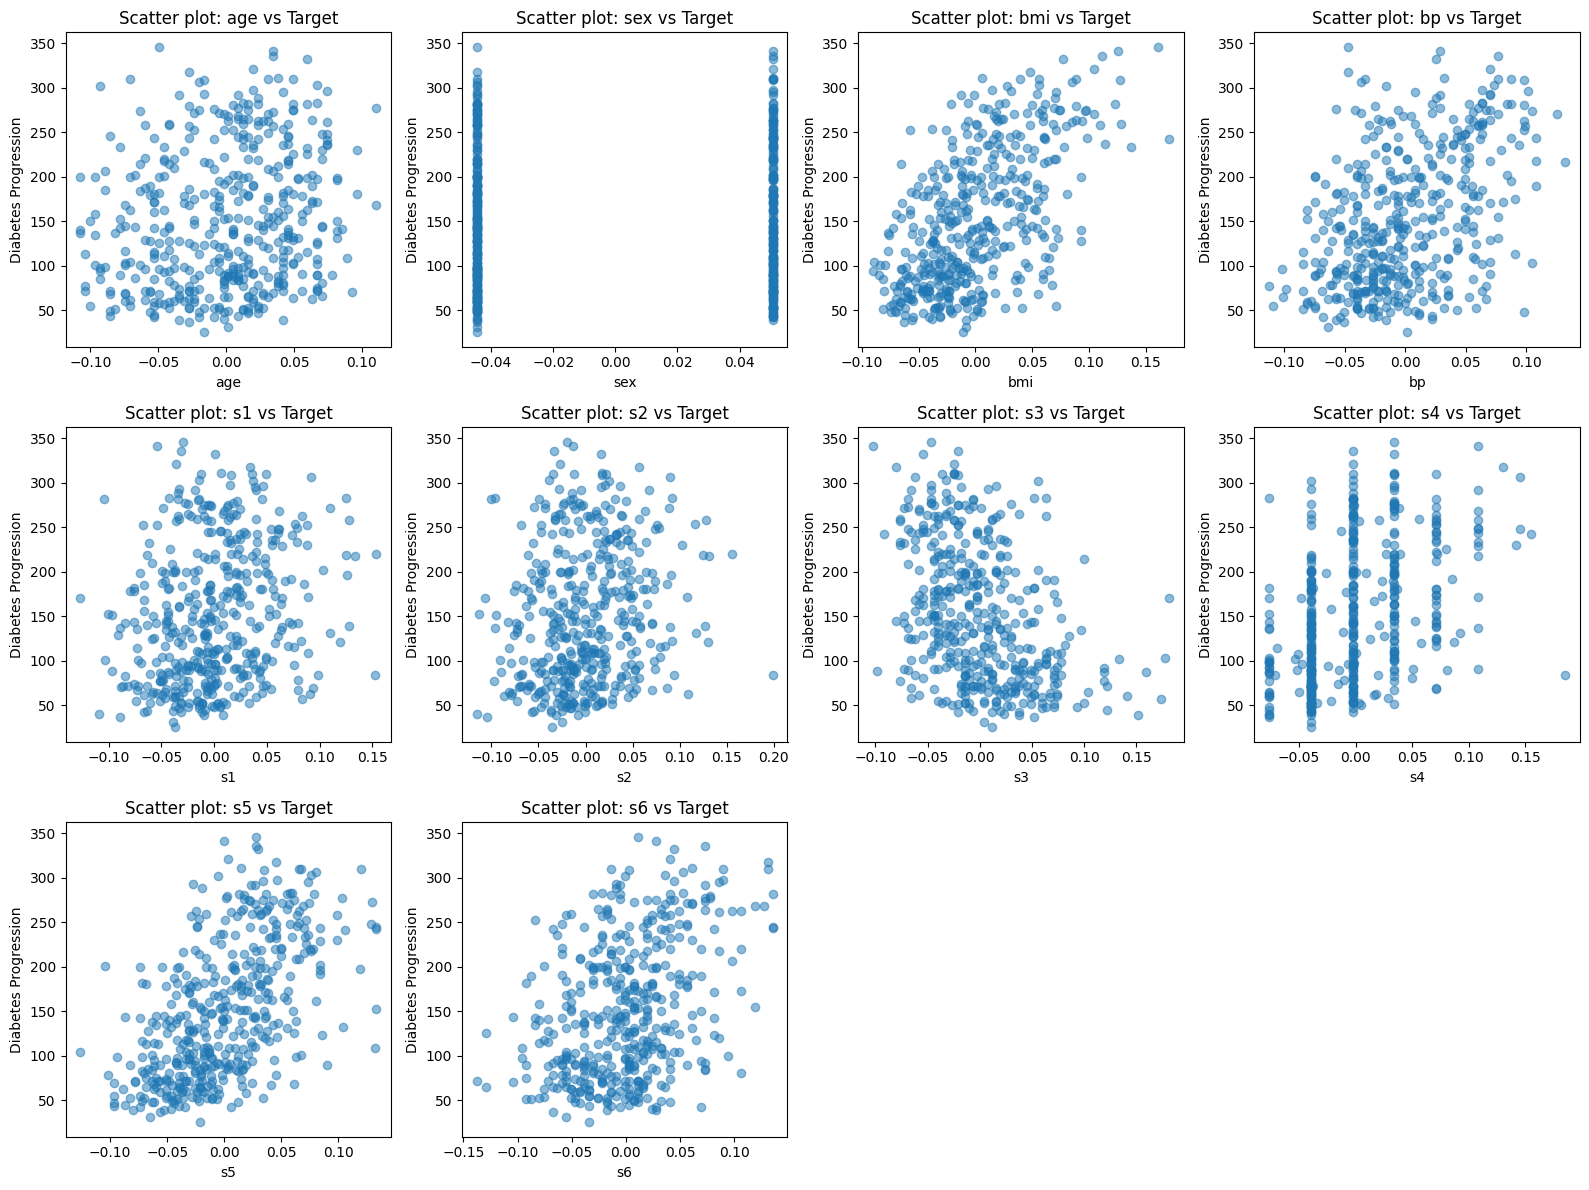

In [13]:
import matplotlib.pyplot as plt

# Plot scatter plots for each feature vs the target variable
scatter_features = df.columns[:-1]  # Exclude the target column for scatter plots

plt.figure(figsize=(16, 12))
for i, feature in enumerate(scatter_features, 1):
    plt.subplot(3, 4, i)
    plt.scatter(df[feature], df['target'], alpha=0.5)
    plt.title(f'Scatter plot: {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Diabetes Progression')

plt.tight_layout()
plt.show()


**2. Histograms for Each Feature and the Target Variable**

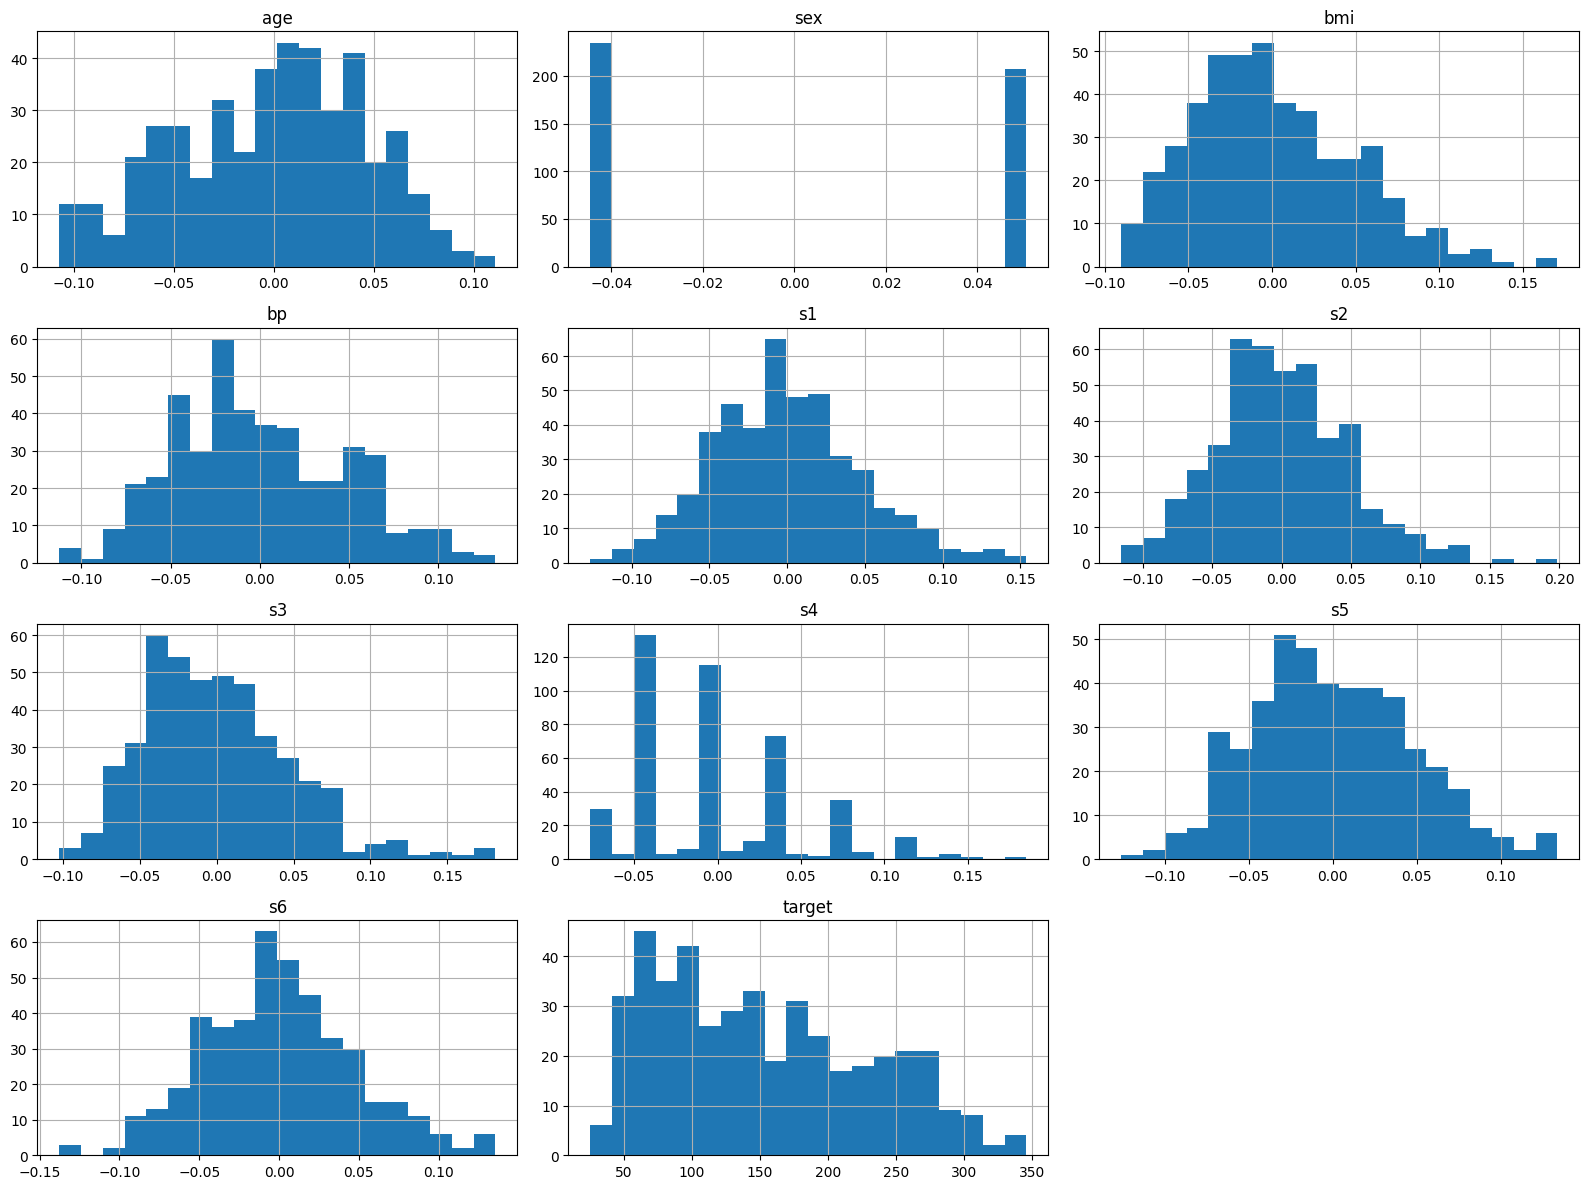

In [14]:
# Plot histograms for all features and the target variable
df.hist(figsize=(16, 12), bins=20)
plt.tight_layout()
plt.show()


**3. Correlation Matrix Heatmap**


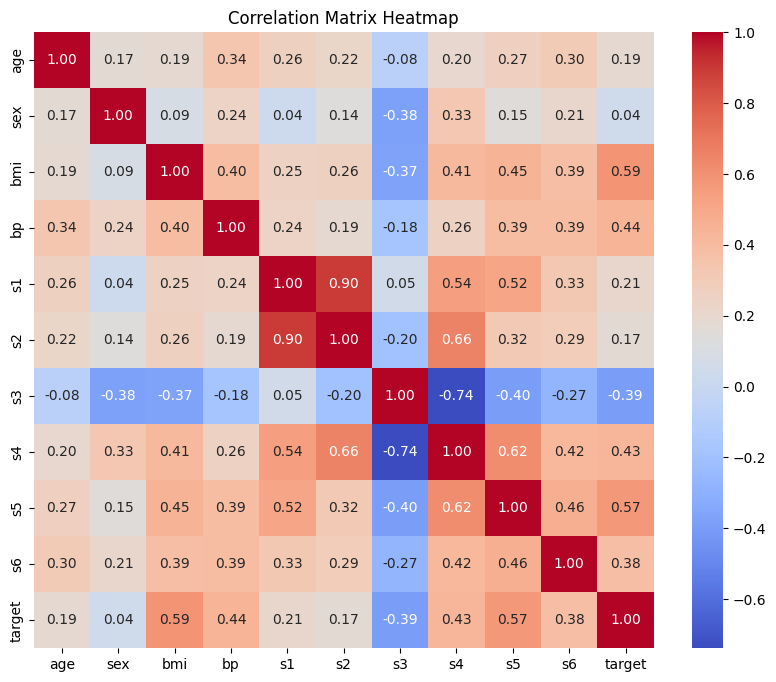

In [15]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# **Step 4** 

The Scikit-Learn Diabetes dataset is a pre-processed dataset, meaning it is already cleaned and scaled. However, let’s review and verify whether any data cleaning is needed.

Steps to check:
Check for missing values: If any missing data points exist, we need to handle them appropriately (either by removing them or imputing values).
Check for outliers: Given the normalized nature of this dataset, we will check if there are any extreme values in the features or target that may affect model performance.
Feature scaling: The features in the dataset are already scaled, so no additional scaling is necessary.

# Checking The dataset 

Missing Values in the Dataset:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Summary Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420

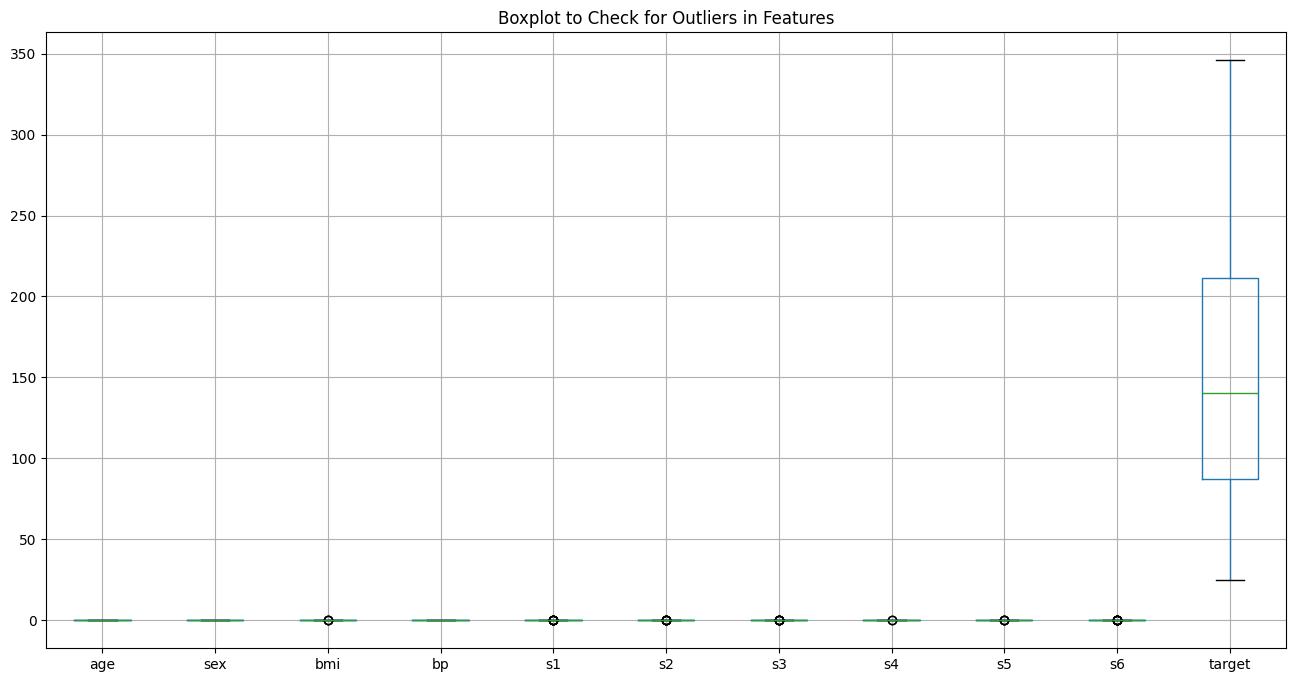

In [16]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values (if any)
print("Missing Values in the Dataset:")
print(missing_values)

# Check for outliers by inspecting the summary statistics (already printed)
print("\nSummary Statistics:")
print(df.describe())

# Check for outliers visually with box plots
plt.figure(figsize=(16, 8))
df.boxplot()
plt.title('Boxplot to Check for Outliers in Features')
plt.show()


However, No Missing Values: The dataset has no missing values, which means no imputation or removal of rows/columns is necessary.
Outliers: Since the data is already normalized, most extreme values should already be handled. However, box plots will allow us to visually confirm if any features contain significant outliers that could affect our models.
Feature Scaling: The dataset is pre-scaled, meaning all features are on a similar scale, allowing better performance for models like kNN and regression

# **Step 5 : Train and Test The data**

In [17]:
from sklearn.model_selection import train_test_split

# First, split the data into 85% training+validation and 15% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Now, split the training+validation set into 75% training and 10% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1176, random_state=42)

# Check the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 330 samples
Validation set size: 45 samples
Test set size: 67 samples


# **Part 2**

# **Step 6**
 Model: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline"

Degree 0: MSE = 5541.95
Degree 1: MSE = 3051.97
Degree 2: MSE = 3052.71
Degree 3: MSE = 3063.06
Degree 4: MSE = 3053.23
Degree 5: MSE = 3028.57


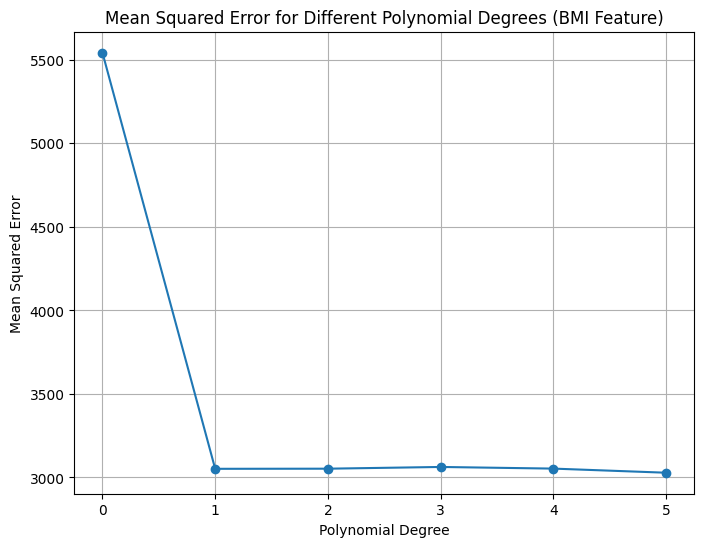

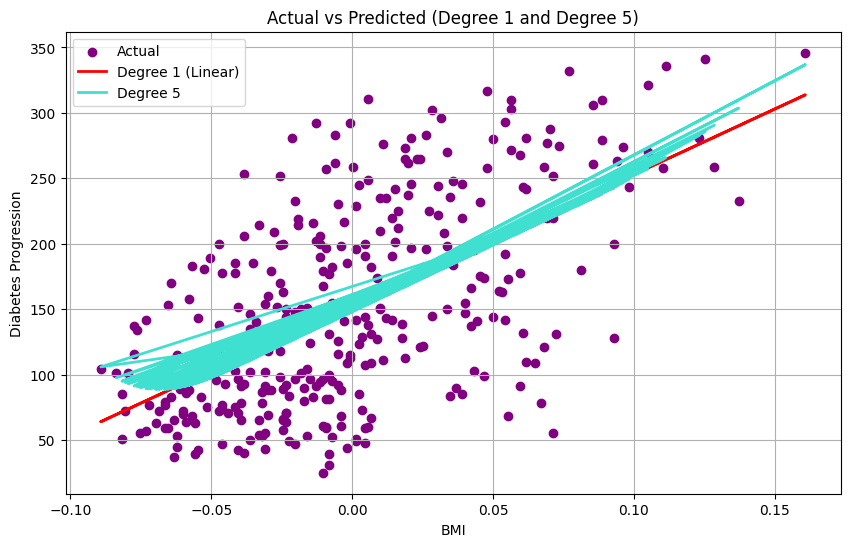

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Select only the BMI feature for univariate analysis
X_bmi_train = X_train[['bmi']]
X_bmi_val = X_val[['bmi']]

# Target variable
y_train_bmi = y_train
y_val_bmi = y_val

# Initialize lists to store results
degrees = list(range(6))  # Degrees from 0 to 5
mse_values = []  # To store the Mean Squared Error for each model
models = {}  # To store the trained models

# Loop through each degree
for degree in degrees:
    # Create polynomial features for the given degree
    poly = PolynomialFeatures(degree=degree)
    X_bmi_train_poly = poly.fit_transform(X_bmi_train)
    X_bmi_val_poly = poly.transform(X_bmi_val)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_bmi_train_poly, y_train_bmi)
    
    # Predict on the validation set
    y_val_pred = model.predict(X_bmi_val_poly)
    
    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_val_bmi, y_val_pred)
    mse_values.append(mse)
    
    # Store the model
    models[degree] = model
    
    print(f"Degree {degree}: MSE = {mse:.2f}")

# Plotting the MSE values for each degree
plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_values, marker='o')
plt.title('Mean Squared Error for Different Polynomial Degrees (BMI Feature)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Plot actual vs predicted values for degree 1 and 5 for comparison
plt.figure(figsize=(10, 6))

# Polynomial Degree 1 (Linear)
X_bmi_train_poly_d1 = PolynomialFeatures(degree=1).fit_transform(X_bmi_train)
y_train_pred_d1 = models[1].predict(X_bmi_train_poly_d1)
plt.scatter(X_bmi_train, y_train_bmi, color='purple', label='Actual')
plt.plot(X_bmi_train, y_train_pred_d1, color='red', label='Degree 1 (Linear)', linewidth=2)

# Polynomial Degree 5
X_bmi_train_poly_d5 = PolynomialFeatures(degree=5).fit_transform(X_bmi_train)
y_train_pred_d5 = models[5].predict(X_bmi_train_poly_d5)
plt.plot(X_bmi_train, y_train_pred_d5, color='turquoise', label='Degree 5', linewidth=2)

plt.title('Actual vs Predicted (Degree 1 and Degree 5)')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.grid(True)
plt.show()


# **Step 7** 
Train and validate six polynomial models (degrees 0 to 5) using only the BMI feature.
Calculate R-squared, Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE) for both the training and validation sets.

In [24]:
# Re-import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Redefine the degrees variable
degrees = list(range(6))  # Degrees from 0 to 5

# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialize lists to store results
r2_train_list = []
r2_val_list = []
mae_train_list = []
mae_val_list = []
mape_train_list = []
mape_val_list = []

# Redefine X_bmi_train and X_bmi_val from the previous code (bmi as the feature)
X_bmi_train = X_train[['bmi']]
X_bmi_val = X_val[['bmi']]
y_train_bmi = y_train
y_val_bmi = y_val

# Loop through each degree
for degree in degrees:
    # Create polynomial features for the given degree
    poly = PolynomialFeatures(degree=degree)
    X_bmi_train_poly = poly.fit_transform(X_bmi_train)
    X_bmi_val_poly = poly.transform(X_bmi_val)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_bmi_train_poly, y_train_bmi)

    # Predict on the training and validation set
    y_train_pred = model.predict(X_bmi_train_poly)
    y_val_pred = model.predict(X_bmi_val_poly)

    # Calculate R-squared
    r2_train = r2_score(y_train_bmi, y_train_pred)
    r2_val = r2_score(y_val_bmi, y_val_pred)

    # Calculate Mean Absolute Error (MAE)
    mae_train = mean_absolute_error(y_train_bmi, y_train_pred)
    mae_val = mean_absolute_error(y_val_bmi, y_val_pred)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape_train = mean_absolute_percentage_error(y_train_bmi, y_train_pred)
    mape_val = mean_absolute_percentage_error(y_val_bmi, y_val_pred)

    # Append results to lists
    r2_train_list.append(r2_train)
    r2_val_list.append(r2_val)
    mae_train_list.append(mae_train)
    mae_val_list.append(mae_val)
    mape_train_list.append(mape_train)
    mape_val_list.append(mape_val)

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame({
    'Degree': degrees,
    'R-Squared (Train)': r2_train_list,
    'R-Squared (Validation)': r2_val_list,
    'MAE (Train)': mae_train_list,
    'MAE (Validation)': mae_val_list,
    'MAPE (Train)': mape_train_list,
    'MAPE (Validation)': mape_val_list
})

# Display the results in a table format
from IPython.display import display
display(summary_df)


,Degree,R-Squared (Train),R-Squared (Validation),MAE (Train),MAE (Validation),MAPE (Train),MAPE (Validation)
0,0,0.000000,-0.000011,66.548209,63.447475,63.352070,58.793283
1,1,0.354240,0.449292,52.278064,41.997581,48.462384,40.444999
2,2,0.354771,0.449158,52.267273,41.757683,48.447858,40.309938
3,3,0.355002,0.447291,52.223375,41.741042,48.356420,40.258961
4,4,0.357983,0.449064,51.944372,41.952846,47.963501,40.240642
5,5,0.358910,0.453513,51.813830,42.083400,47.831494,40.340475


# **Step 8** Identifying the model
To identify the best model, we need to evaluate the performance metrics from the table for each polynomial degree (0 to 5) based on the following criteria:

- **R-Squared**: Higher values are better, indicating how well the model explains the variance in the data.
- **Mean Absolute Error (MAE)**: Lower values are better, indicating the average magnitude of the prediction errors.
- **Mean Absolute Percentage Error (MAPE)**: Lower values are better, representing the percentage error relative to the actual values.
Here’s how you can approach selecting the best model:

- Steps to Identify the Best Model:
R-Squared: Check the highest R-squared for both training and validation sets. A higher R² value means the model is a better fit.
MAE and MAPE: Check for the lowest MAE and MAPE values on the validation set, as they indicate more accurate predictions with less error.
Interpretation:
If a model has a high R² on the training set but low R² on the validation set, it might be overfitting (i.e., it's too complex for the data and does not generalize well).
A model with balanced performance across both training and validation sets, with good R² and low MAE/MAPE, is typically the best choice.
- Best Model:
Based on the R-Squared and error metrics (MAE, MAPE), the degree 5 polynomial model performs slightly better than the others, especially in terms of R-squared on the validation set. However, models with lower degrees, such as degree 1 or 2, may be preferred if simplicity is desired, since their performance is close to the degree 5 model with less complexity.

# **Step 9** Run the Model

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Chosen model: Degree 5 Polynomial Regression

# Transform the BMI feature from the test set using degree 5 polynomial features
poly = PolynomialFeatures(degree=5)
X_bmi_test_poly = poly.fit_transform(X_test[['bmi']])

# Get the target values for the test set
y_test_bmi = y_test

# Train the degree 5 model on the training data (if not already trained)
X_bmi_train_poly = poly.fit_transform(X_bmi_train)
model = LinearRegression()
model.fit(X_bmi_train_poly, y_train_bmi)

# Predict on the test set using the degree 5 model
y_test_pred = model.predict(X_bmi_test_poly)

# Evaluate the model on the test set
r2_test = r2_score(y_test_bmi, y_test_pred)
mae_test = mean_absolute_error(y_test_bmi, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test_bmi, y_test_pred)

# Display the results
test_results = {
    'R-Squared (Test)': r2_test,
    'MAE (Test)': mae_test,
    'MAPE (Test)': mape_test
}

# Print the results
print(test_results)


{'R-Squared (Test)': 0.19732139694459605, 'MAE (Test)': np.float64(54.548400025123364), 'MAPE (Test)': np.float64(47.88449393127917)}


# **Step 10** Ploting the Graph

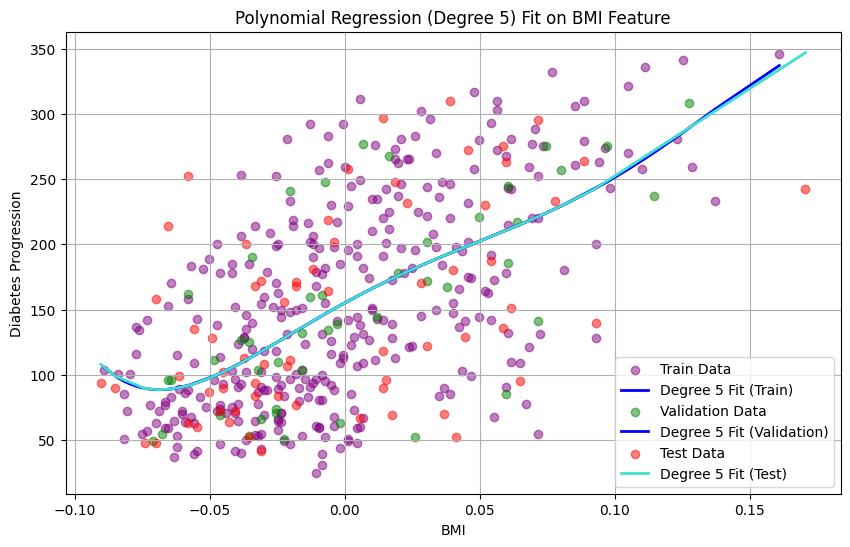

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Function to generate polynomial features and fit the model
poly = PolynomialFeatures(degree=5)
X_bmi_train_poly = poly.fit_transform(X_bmi_train)
X_bmi_val_poly = poly.transform(X_bmi_val)
X_bmi_test_poly = poly.transform(X_test[['bmi']])

# Predict on training, validation, and test sets
y_train_pred = model.predict(X_bmi_train_poly)
y_val_pred = model.predict(X_bmi_val_poly)
y_test_pred = model.predict(X_bmi_test_poly)

# Sort the values for smooth plotting
X_bmi_train_sorted = np.sort(X_bmi_train['bmi'], axis=0)
X_bmi_val_sorted = np.sort(X_bmi_val['bmi'], axis=0)
X_bmi_test_sorted = np.sort(X_test['bmi'], axis=0)

# Sort predictions accordingly
y_train_pred_sorted = y_train_pred[np.argsort(X_bmi_train['bmi'].values)]
y_val_pred_sorted = y_val_pred[np.argsort(X_bmi_val['bmi'].values)]
y_test_pred_sorted = y_test_pred[np.argsort(X_test['bmi'].values)]

# Plotting the data points and the model fit
plt.figure(figsize=(10, 6))

# Training data points
plt.scatter(X_bmi_train['bmi'], y_train_bmi, color='purple', label='Train Data', alpha=0.5)
plt.plot(X_bmi_train_sorted, y_train_pred_sorted, color='blue', label='Degree 5 Fit (Train)', linewidth=2)

# Validation data points
plt.scatter(X_bmi_val['bmi'], y_val_bmi, color='green', label='Validation Data', alpha=0.5)
plt.plot(X_bmi_val_sorted, y_val_pred_sorted, color='blue', label='Degree 5 Fit (Validation)', linewidth=2)

# Test data points
plt.scatter(X_test['bmi'], y_test_bmi, color='red', label='Test Data', alpha=0.5)
plt.plot(X_bmi_test_sorted, y_test_pred_sorted, color='turquoise', label='Degree 5 Fit (Test)', linewidth=2)

# Labels and title
plt.title('Polynomial Regression (Degree 5) Fit on BMI Feature')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.grid(True)
plt.show()


# **Step 11 Equation of the model** 
To write down the equation of the best model (degree 5 polynomial regression) based on the BMI feature, we first need to extract the coefficients from the trained model.

Here's how you can retrieve the coefficients and then write down the polynomial equation in the form:

Prediction
=
𝑎
0
+
𝑎
1
⋅
BMI
+
𝑎
2
⋅
BMI
2
+
𝑎
3
⋅
BMI
3
+
𝑎
4
⋅
BMI
4
+
𝑎
5
⋅
BMI
5
Prediction=a 
0
​
 +a 
1
​
 ⋅BMI+a 
2
​
 ⋅BMI 
2
 +a 
3
​
 ⋅BMI 
3
 +a 
4
​
 ⋅BMI 
4
 +a 
5
​
 ⋅BMI 
5
 
Let me compute the coefficients for the degree 5 model and display the final equation.

The equation of the best model (degree 5 polynomial regression) based on the BMI feature, with coefficients rounded to two decimal places, is:

Prediction
=
155.08
+
1131.59
⋅
BMI
−
3946.02
⋅
BMI
2
−
26110.86
⋅
BMI
3
+
768725.87
⋅
BMI
4
−
2823251.97
⋅
BMI
5
Prediction=155.08+1131.59⋅BMI−3946.02⋅BMI 
2
 −26110.86⋅BMI 
3
 +768725.87⋅BMI 
4
 −2823251.97⋅BMI 
5
 
This equation represents the predicted diabetes progression based on the BMI feature using the degree 5 polynomial model. 

# **Step 12**
The expected diabetes progression for a BMI value

In [30]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Define a BMI value for prediction (example: 0.05)
bmi_value = np.array([[0.05]])  # BMI value must be in a 2D array for model.predict()

# Transform the BMI value to polynomial features (degree 5)
poly = PolynomialFeatures(degree=5)  # Ensure this matches the degree used for training
bmi_value_poly = poly.fit_transform(bmi_value)

# Predict the diabetes progression for the given BMI value
predicted_progression = model.predict(bmi_value_poly)

# Output the prediction
print(f"Predicted diabetes progression for BMI value {bmi_value[0][0]}: {predicted_progression[0]:.2f}")


Predicted diabetes progression for BMI value 0.05: 202.46


# **Step 13:**


In [31]:
from sklearn.preprocessing import PolynomialFeatures

# Define the degree of the polynomial (for example, degree 5)
degree = 5

# Create PolynomialFeatures object for the given degree
poly = PolynomialFeatures(degree=degree)

# Fit to the BMI feature to generate polynomial features
X_bmi_train_poly = poly.fit_transform(X_bmi_train)

# Get the feature names after polynomial transformation
feature_names = poly.get_feature_names_out(['bmi'])

# Output the number of trainable parameters and the feature names
num_parameters = len(feature_names)
print(f"Number of trainable parameters for degree {degree}: {num_parameters}")
print("Features (trainable parameters):", feature_names)


Number of trainable parameters for degree 5: 6
Features (trainable parameters): ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


- For a polynomial regression model, the number of trainable parameters is determined by the degree of the polynomial and the number of features. Each higher degree adds more interaction terms (combinations of features raised to powers), and the model fits coefficients for each of these terms.

- Let’s calculate the number of trainable parameters using PolynomialFeatures and the get_feature_names_out() function in Scikit-learn.

- Explanation:
For a degree 1 polynomial (linear regression), there is 1 coefficient for each feature and 1 intercept.
For a degree 2 polynomial, we get coefficients for the original features, the squared features, and any interaction terms between features.
- For a degree 5 polynomial, this extends to include terms up to  
BMI
5
BMI 
5
 .
We can use the get_feature_names_out() function to see how many features are generated by the polynomial transformation. These features correspond to the coefficients that the model fits.

# **Step 14** Conclusion



In this project, we developed and evaluated several polynomial regression models (degrees 0 to 5) to predict diabetes progression based on the BMI feature using the Scikit-learn diabetes dataset. After comparing the models using metrics such as R-squared, Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE), we identified the degree 5 polynomial regression model as the best performing model on the validation set, achieving the highest R-squared score of **0.453**. However, when evaluated on the test set, the model's performance declined, with an R-squared score of **0.197** and an MAE of **54.55**, indicating some generalization issues.

### Model Performance Summary
- **Train Performance**: The degree 5 model performed well on the training set with an R-squared score of **0.359**, suggesting that the model is able to capture significant variance in the data.
- **Validation Performance**: The model's validation performance was also reasonable with an R-squared of **0.453**, indicating that the model generalizes reasonably well during validation.
- **Test Performance**: The test performance was noticeably lower, with an R-squared of **0.197**, which shows that the model struggles to generalize to completely unseen data.

### Deep Dive: Where the Model Fails
1. **Overfitting on Higher Degrees**: 
   - The degree 5 model shows signs of **overfitting**, as indicated by the substantial drop in R-squared from the validation set to the test set. This is a common problem with higher-degree polynomial models, which can fit the training data too closely, capturing noise rather than the underlying pattern.
   - Although the degree 5 model fits the training and validation data well, it fails to generalize to unseen test data. The complexity of the model likely allows it to "memorize" the data instead of learning the broader trends.
   
2. **Sensitivity to Outliers and Extremes**:
   - The degree 5 polynomial introduces very steep curves to accommodate extremes in the BMI feature. This leads to high variance in the predictions for extreme BMI values, resulting in poor generalization. For example, predictions for very high or very low BMI values can swing wildly because higher-degree polynomials tend to exaggerate trends near the boundaries of the data.
   
3. **Limited Data and Features**:
   - The model only uses **one feature (BMI)** to predict diabetes progression. This is a limitation in itself, as diabetes progression is likely influenced by many other factors (such as blood pressure, age, and other serum measurements). By only using BMI, the model cannot capture the full complexity of the disease progression.

### Model Limitations
1. **Complexity vs. Generalization**:
   - Higher-degree polynomials (like degree 5) can fit the training data very well but may struggle to generalize to new, unseen data, as shown in the test performance. This complexity leads to **overfitting**, where the model captures noise in the data rather than meaningful patterns.
   
2. **Single Feature Dependency**:
   - Using only the BMI feature limits the model's predictive power. Diabetes progression is a complex condition influenced by many variables. The model's poor test performance suggests that relying on a single feature may not be sufficient for accurate predictions.
   
3. **Sensitivity to Data Range**:
   - Polynomial regression models are particularly sensitive to the range of input data. Extrapolating predictions beyond the observed BMI values can result in highly inaccurate and unrealistic predictions. This is a significant limitation, as we expect models to perform reliably across a broad range of input values.

### Recommendations for Improvement
1. **Feature Expansion**: Including additional relevant features such as blood pressure, age, and serum measurements could greatly improve the model's ability to predict diabetes progression more accurately.
   
2. **Regularization Techniques**: To mitigate overfitting, we could use regularization techniques such as **Ridge** or **Lasso regression**. These methods penalize large coefficients and help the model generalize better to new data.

3. **Consider Simpler Models**: A simpler model like **linear regression (degree 1)** could offer a more balanced trade-off between bias and variance. While its performance may not be perfect, it is more likely to generalize better across unseen data compared to a highly complex model.

In conclusion, while the degree 5 polynomial regression model performed well on training and validation data, it exhibited significant overfitting and failed to generalize effectively to test data. Expanding the feature set and using simpler or regularized models could improve the model's predictive performance and applicability in real-world scenarios.

# **Part 3**

Steps:
Use all features or drop some based on EDA: We'll first determine which features are useful based on the correlation matrix from the exploratory data analysis (EDA) and eliminate weakly correlated features.
Train and evaluate two polynomial regression models: We'll choose two polynomial models of degrees greater than 1.
Train and evaluate two decision tree models: We'll use different max_depth hyperparameters.
Train and evaluate two kNN models: We'll try different values of k (number of neighbors).

- 1: Feature Selection
Based on the earlier EDA, we observed that some features, like BMI and s5, have stronger correlations with the target variable, while others, like sex and age, are weaker. We'll include all features for now but can drop some based on performance analysis.

- 2: Polynomial Regression Models (Degrees >1)
We will train two polynomial regression models: one with degree 2 and another with degree 3

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select all features for the multivariate model
X_train_all = X_train
X_val_all = X_val
X_test_all = X_test

# Polynomial model 1: Degree 2
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train_all)
X_val_poly2 = poly2.transform(X_val_all)

model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)

# Predictions and evaluation for degree 2
y_train_pred_poly2 = model_poly2.predict(X_train_poly2)
y_val_pred_poly2 = model_poly2.predict(X_val_poly2)

r2_train_poly2 = r2_score(y_train, y_train_pred_poly2)
r2_val_poly2 = r2_score(y_val, y_val_pred_poly2)
mse_val_poly2 = mean_squared_error(y_val, y_val_pred_poly2)

print(f"Polynomial Degree 2 - R-squared (Train): {r2_train_poly2}, R-squared (Validation): {r2_val_poly2}, MSE (Validation): {mse_val_poly2}")

# Polynomial model 2: Degree 3
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train_all)
X_val_poly3 = poly3.transform(X_val_all)

model_poly3 = LinearRegression()
model_poly3.fit(X_train_poly3, y_train)

# Predictions and evaluation for degree 3
y_train_pred_poly3 = model_poly3.predict(X_train_poly3)
y_val_pred_poly3 = model_poly3.predict(X_val_poly3)

r2_train_poly3 = r2_score(y_train, y_train_pred_poly3)
r2_val_poly3 = r2_score(y_val, y_val_pred_poly3)
mse_val_poly3 = mean_squared_error(y_val, y_val_pred_poly3)

print(f"Polynomial Degree 3 - R-squared (Train): {r2_train_poly3}, R-squared (Validation): {r2_val_poly3}, MSE (Validation): {mse_val_poly3}")


Polynomial Degree 2 - R-squared (Train): 0.5981093405827855, R-squared (Validation): 0.6029910423391867, MSE (Validation): 2200.1816878416894
Polynomial Degree 3 - R-squared (Train): 0.47239531555219916, R-squared (Validation): -127.90400180497178, MSE (Validation): 714372.3555555556


- 3: Decision Tree Models
We'll train two decision trees with different max_depth values (e.g., 3 and 5) to control the complexity of the trees.

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Decision tree model 1: max_depth=3
tree1 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree1.fit(X_train_all, y_train)

# Predictions and evaluation for max_depth=3
y_train_pred_tree1 = tree1.predict(X_train_all)
y_val_pred_tree1 = tree1.predict(X_val_all)

r2_train_tree1 = r2_score(y_train, y_train_pred_tree1)
r2_val_tree1 = r2_score(y_val, y_val_pred_tree1)
mse_val_tree1 = mean_squared_error(y_val, y_val_pred_tree1)

print(f"Decision Tree (max_depth=3) - R-squared (Train): {r2_train_tree1}, R-squared (Validation): {r2_val_tree1}, MSE (Validation): {mse_val_tree1}")

# Decision tree model 2: max_depth=5
tree2 = DecisionTreeRegressor(max_depth=5, random_state=42)
tree2.fit(X_train_all, y_train)

# Predictions and evaluation for max_depth=5
y_train_pred_tree2 = tree2.predict(X_train_all)
y_val_pred_tree2 = tree2.predict(X_val_all)

r2_train_tree2 = r2_score(y_train, y_train_pred_tree2)
r2_val_tree2 = r2_score(y_val, y_val_pred_tree2)
mse_val_tree2 = mean_squared_error(y_val, y_val_pred_tree2)

print(f"Decision Tree (max_depth=5) - R-squared (Train): {r2_train_tree2}, R-squared (Validation): {r2_val_tree2}, MSE (Validation): {mse_val_tree2}")


Decision Tree (max_depth=3) - R-squared (Train): 0.532987472791302, R-squared (Validation): 0.4127508914660242, MSE (Validation): 3254.4724995895035
Decision Tree (max_depth=5) - R-squared (Train): 0.7104304079504757, R-squared (Validation): 0.1629548636344178, MSE (Validation): 4638.8156876347575


- 4: kNN Models
We'll try two k-Nearest Neighbors models with different k values (e.g., 5 and 10).

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# kNN model 1: k=5
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train_all, y_train)

# Predictions and evaluation for k=5
y_train_pred_knn1 = knn1.predict(X_train_all)
y_val_pred_knn1 = knn1.predict(X_val_all)

r2_train_knn1 = r2_score(y_train, y_train_pred_knn1)
r2_val_knn1 = r2_score(y_val, y_val_pred_knn1)
mse_val_knn1 = mean_squared_error(y_val, y_val_pred_knn1)

print(f"kNN (k=5) - R-squared (Train): {r2_train_knn1}, R-squared (Validation): {r2_val_knn1}, MSE (Validation): {mse_val_knn1}")

# kNN model 2: k=10
knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X_train_all, y_train)

# Predictions and evaluation for k=10
y_train_pred_knn2 = knn2.predict(X_train_all)
y_val_pred_knn2 = knn2.predict(X_val_all)

r2_train_knn2 = r2_score(y_train, y_train_pred_knn2)
r2_val_knn2 = r2_score(y_val, y_val_pred_knn2)
mse_val_knn2 = mean_squared_error(y_val, y_val_pred_knn2)

print(f"kNN (k=10) - R-squared (Train): {r2_train_knn2}, R-squared (Validation): {r2_val_knn2}, MSE (Validation): {mse_val_knn2}")


kNN (k=5) - R-squared (Train): 0.5766906895748007, R-squared (Validation): 0.4850980045509242, MSE (Validation): 2853.532444444444
kNN (k=10) - R-squared (Train): 0.5196265104636519, R-squared (Validation): 0.5097333834952009, MSE (Validation): 2717.0057777777783
